#intro toNeural Networks
#Carlos Gross-Martinez
#Z23226341
#Homework 3
#Answer Question 11

In [25]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#import class 1 data set into pandas dataframe
class1 = pd.read_csv("/content/drive/MyDrive/Neural Networks/Datasets/Class1.txt")
print(class1.shape)
class1.head()

(100, 2)


,weight,height
0,0.132,0.757
1,0.722,0.888
2,0.095,0.804
3,0.633,0.530
4,0.472,0.701


In [27]:
#import class 2 data set into pandas dataframe
class2 = pd.read_csv("/content/drive/MyDrive/Neural Networks/Datasets/Class2.txt")
print(class2.shape)
class2.head()

(100, 2)


,weight,height
0,0.407,0.347
1,0.726,0.761
2,0.644,0.415
3,0.076,0.143
4,0.110,0.010


In [28]:
#class labels definition
posLabel = 2
negLabel = -2

#Threshold calculation to distinct both classes 
T = (posLabel + negLabel) / 2

#adding labels to classes in data frames
class1.insert(class1.shape[1], 'label', posLabel)
class2.insert(class2.shape[1], 'label', negLabel)

#combining both classes into one data frame
class12 = class1.append(class2)
print(class12.shape)
class12.head()

(200, 3)


,weight,height,label
0,0.132,0.757,2
1,0.722,0.888,2
2,0.095,0.804,2
3,0.633,0.530,2
4,0.472,0.701,2


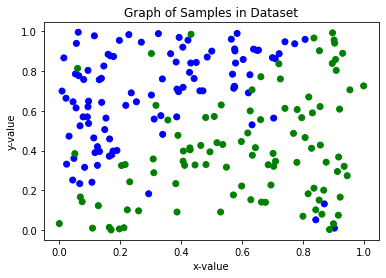

In [29]:
#plottong data samples from both classes
colors = ["green", "", "", "","blue"]
plt.scatter(class12.iloc[:,0], class12.iloc[:,1], color = [colors[idx + 2] for idx in class12.iloc[:,2]])
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.title('Graph of Samples in Dataset')
plt.show()

In [30]:
#shuffling the classes and extracting features and labels from the data set
class12_rand = shuffle(class12)
features, labels = class12_rand.iloc[:, 0:-1], class12_rand.loc[:,['label']]
print(features)
print(labels)

    weight  height
95   0.870   0.132
10   0.695   0.227
47   0.700   0.868
60   0.205   0.325
12   0.741   0.613
..     ...     ...
40   0.309   0.358
44   0.854   0.903
40   0.501   0.901
59   0.842   0.102
38   0.807   0.960

[200 rows x 2 columns]
    label
95      2
10     -2
47      2
60     -2
12     -2
..    ...
40     -2
44     -2
40      2
59     -2
38      2

[200 rows x 1 columns]


In [31]:
#splitting data set into 80% training and 20% testing 
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 2)
(160, 1)
(40, 2)
(40, 1)


In [32]:
#converting data frame into matrix format for faster arithmetic calculations
x_train_m = np.asmatrix(x_train, dtype = 'float64')
y_train_m = np.asmatrix(y_train, dtype = 'float64')
x_test_m = np.asmatrix(x_test, dtype = 'float64')
y_test_m = np.asmatrix(y_test, dtype = 'float64')

print(x_train_m.shape)
print(y_train_m.shape)
print(x_test_m.shape)
print(y_test_m.shape)

(160, 2)
(160, 1)
(40, 2)
(40, 1)


In [33]:
#gradient descent function
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels):

  #randomly initialize weight values with range: [-0.5,0.5]
  w = np.random.rand(features.shape[1]+1)-0.5
  totalSquaredErr_ = []
  totalSquaredErrTest_ = []
  accuracy_= []
  epoch = 0
  err = 9999.0

  while (epoch<max_iter) and (err>err_threshold):
    
    misclassified = 0
    deltaw = [0] * (features.shape[1] + 1)

    for i, x in enumerate(features):
      x = np.insert(x,0,1)

      v = np.dot(w, x.transpose())

      diff = learning_rate*(labels[i] - v)
      deltaw = deltaw + diff * x

    #update weights
    #print(deltaw)
    w = w + deltaw

    # now calculate training error using new weights
    this_err=0
    for i, x in enumerate(features):
      x = np.insert(x,0,1)
      v = np.dot(w, x.transpose())
      this_err=this_err+(labels[i] - v)*(labels[i] - v)

    this_err=np.ndarray.item(this_err)
    this_err=this_err/2.0

    #mean squared error
    err = this_err/features.shape[0]
    totalSquaredErr_.append(err)

    # now calculate test error using new weights
    this_err=0
    for i, x in enumerate(test_features):
      #inserting bias
      x = np.insert(x,0,1)      
      #compute local field
      v = np.dot(w, x.transpose())
      this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        
    this_err=np.ndarray.item(this_err)
    this_err=this_err/2.0
    totalSquaredErrTest_.append(this_err/test_features.shape[0])

    # now calculate test classification accuracy
    this_err=0
    for i, x in enumerate(test_features):
      x = np.insert(x,0,1)
      v = np.dot(w, x.transpose())
      if(((v-T)>=0 and test_labels[i]==negLabel) or ((v-T)<0 and test_labels[i]==posLabel)):
        this_err=this_err + 1


    this_err=float(this_err)
    this_err=this_err/test_features.shape[0]
    accuracy_.append(1-this_err)

    #next epoch
    epoch=epoch+1
  return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)

In [34]:
#variable declaration and initialization
max_iter = 2000
eta=1.0/x_train.shape[0]
err_threshold=0.1
print("Learning rate is: %.5f" % eta)

w, misclassified, testError, accuracy = GradientDescentLearning(x_train_m, y_train_m, max_iter, eta, err_threshold,
                                                                x_test_m, y_test_m)

print(misclassified[0:10])
print(testError[0:10])
print(accuracy[0:10])

Learning rate is: 0.00625
[1.9294914710005018, 1.783107913153005, 1.669503843835228, 1.577487893456413, 1.5017253161985924, 1.438965883942167, 1.3868617531168794, 1.3435674045279984, 1.3075808612308142, 1.2776635449869425]
[2.008408881122702, 1.772869188881296, 1.7159938041483336, 1.6007142450515375, 1.539894723383526, 1.4696164103978142, 1.41976461254396, 1.3721587816072849, 1.3342425039734216, 1.3004017748010575]
[0.44999999999999996, 0.825, 0.725, 0.925, 0.875, 0.925, 0.925, 0.925, 0.925, 0.925]


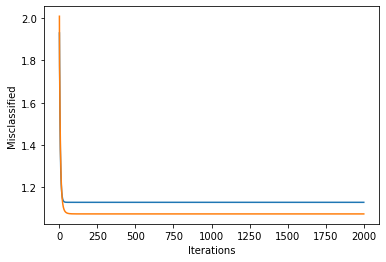

In [35]:
#plotting of training and test error
epochs = np.arange(1, max_iter + 1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.xlabel('Iterations')
plt.ylabel('Misclassified')
plt.show()

[[-0.16145649 -3.2517028   3.03286321]]
1.0721561026648667 0.053235665047821214


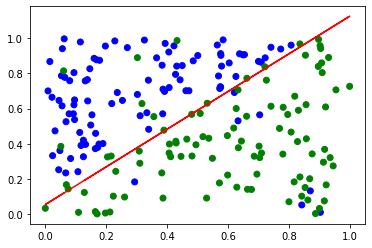

In [36]:
#calculating slope and intercept of decision surface
slope = w[0, 1]/w[0,2]*(-1)
intercept = (T-w[0,0]/w[0,2])

#Printing weights, slope, and intercept
print(w)
print(slope, intercept)

#printing scatter plot and decision surface line
colors = ["green", "", "", "","blue"]
xvalues=class12.iloc[:,0]
yvalues=xvalues * slope + intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+2] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"r-")

In [37]:
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold):

  # random initialize weight values between rage: [-0.5,0.5]
  w = np.random.rand(features.shape[1]+1)-0.5

  totalSquaredErr_ = []
  epoch=0
  err=9999.0

  while (epoch<max_iter) and (err>err_threshold):
    misclassified = 0
    deltaw=[0]*(features.shape[1]+1)
    # random select an instance
    i=random.randrange(features.shape[0])

    x=features[i,]
    x = np.insert(x,0,1)

    v = np.dot(w, x.transpose())

    diff = learning_rate * (labels[i] - v)
    deltaw = deltaw + diff * x

    #update weights
    #print(deltaw)
    w=w+deltaw

    # now calculate error using new weights
    this_err=0
    for i, x in enumerate(features):
      x = np.insert(x,0,1)
      v = np.dot(w, x.transpose())
      this_err=this_err+(labels[i] - v)*(labels[i] - v)

    this_err=np.asscalar(this_err)
    this_err=this_err/2.0
    totalSquaredErr_.append(this_err)
    
    #mean squared error
    err=this_err/features.shape[0]
    epoch=epoch+1
  return (w, totalSquaredErr_)

In [38]:
#variable declaration and initialization
max_iter = 2000
#eta=1.0/x_train.shape[0]
eta = 0.01
err_threshold=0.1
print("Learning rate is: %.5f" % eta)

w, misclassified = Delta(x_train_m, y_train_m, max_iter, eta, err_threshold)                     

print(misclassified[0:10])

Learning rate is: 0.01000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


[354.4468276266348, 353.22254376168814, 352.1326347698061, 352.6268912782509, 351.6069900370395, 350.8234776599437, 350.0971375026386, 348.84431235323825, 348.8895114822119, 348.46442664654916]


<function matplotlib.pyplot.show>

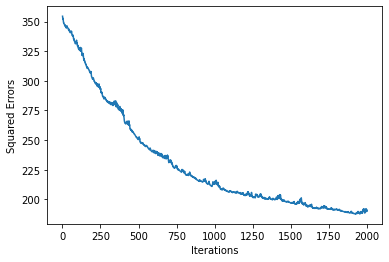

In [39]:
#plotting square error
epochs = np.arange(1, max_iter + 1)
plt.plot(epochs, misclassified)
plt.xlabel('Iterations')
plt.ylabel('Squared Errors')
plt.show

The similarity between the Delta rule function and the Gradient descent learning rule is that both of the algorithms utilize the same mathematical computations in order to update the weights of the neuron. Nevertheless, the Delta rule function only takes one random sample from the data set at a time to apply the algorithms to update the weights. On the other hand, the gradient descent groups a batch of samples and calculate their change in weights individually. Then, it adds the weights together to create the change in weight that needs to be added to the old weights. Some of the advantages of stochastic gradient descent includes that it is fast to calculate since one sample is processed each time. Also, its stochastic approach to updating the weights while searching for the global minima, helps the model avoid, skip, or get out of local minima. On the other hand, some of the disadvantages of stochastic gradient descent include noisy steps since it updates the weights constantly, causing the gradient descent to take longer to find the local minima. Also, the noisy steps could lead the gradient descent into undesirable directions making it harder and longer to find the global minima. On the other side of the spectrum, some of the advantages include less noisy steps towards the global minima. Moreover, it can use vectorization to process the computational speed of computations. Nevertheless, one of the biggest disadvantages from gradient descent is that if the gradient leads to the local minima of the plane, then the model would not be able to get out the local minima to reach the global minima. Additionally, if the batch of samples is too large, then the model will take longer an use more resources in order to obtain the decision surface line.
#Answer Question 12

In [40]:
#import review100 data set into pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Neural Networks/Datasets/review100.csv")
print(df.shape)
df.head()

(100, 2)


,movie review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
#tokenizing the words and adding it to list
import nltk
nltk.download('punkt')
#from nltk.tokenize import word_tokenize
from nltk.tokenize import SpaceTokenizer

words = []
tk = SpaceTokenizer()

for i in range(0,df.shape[0]):
  words.append(tk.tokenize(df.loc[i][0]))

#for i in range(0, df.shape[0]):
  #words.append(word_tokenize(str(df.loc[i]))) 
  
print(len(words))
#print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100


In [42]:
#filtering words list to new list with unrepeated words
wordList = []
wordCount = []

#loops for 100 times
for i in range(0, len(words)):
  
  #loops number of words in each review
  for j in range(0, len(words[i])):

    inList = 0

    #checking word list with current
    for k in range(0, len(wordList)):

      #condition that checks if word is in the list
      if str(wordList[k]) == str(words[i][j]):
        wordCount[k] += 1
        inlist = 1

    #condition that appends word to list if not found
    if inList == 0:
      wordList.append(words[i][j])
      wordCount.append(1)


#print(wordList)
#print(len(wordList))
#print(wordCount)
#print(len(wordCount))

In [43]:
#creating data frame an sorting top 1000 most used words
updatedList = list(zip(wordList, wordCount))

updatedDF = pd.DataFrame(updatedList, columns=['word','w-count'])
sortedDF = updatedDF.sort_values(by='w-count', ascending=False)

sortedDF = sortedDF.iloc[0:1000]

#print(sortedDF)
print(sortedDF.shape)

(1000, 2)


In [44]:
#representing words as instances with values

wordFeatures = []

for i in range(0, sortedDF.shape[0]):
  wordFeatures.append(sortedDF.iloc[i][0])

#print(wordFeatures)
print(len(wordFeatures))

1000
